In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

**Odds and Odds Ratio**

In [3]:
# example to display how log odds help to differentiate between the Odds in favour and Odd in against
#p=6/10
odds_in_favor= 6/4
print("odds in favour=",odds_in_favor)

print("Log of odds", np.log(odds_in_favor))

odds_against= 4/6
print("odds against =", odds_against)
print("Log of odds against",  np.log(odds_against))

# odds are called as likelihoods and log(odds)  log-likelihoods are same in magnitude

odds in favour= 1.5
Log of odds 0.4054651081081644
odds against = 0.6666666666666666
Log of odds against -0.40546510810816444


**Admission Predict Case Study**

In [4]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [5]:
df=pd.read_csv("Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [6]:
df.shape

(400, 9)

In [7]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.2 KB


In [9]:
df.drop('Serial No.', axis =1, inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [10]:
df.columns


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [11]:
X= df.drop('Chance of Admit',axis=1)
y =df['Chance of Admit']

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,
                                             test_size=0.20,
                                             random_state=10)

In [13]:
ytrain.value_counts(normalize=True)
# This seems to be balanced dataset.

0    0.55625
1    0.44375
Name: Chance of Admit, dtype: float64

In [14]:
xtrain.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [15]:
xtrain_c=sm.add_constant(xtrain)
xtest_c=sm.add_constant(xtest)

In [16]:
xtrain_c.columns

Index(['const', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR',
       'CGPA', 'Research'],
      dtype='object')

In [17]:
logreg =sm.Logit(ytrain,xtrain_c).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.241326
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Chance of Admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      312
Method:                           MLE   Df Model:                            7
Date:                Fri, 24 Mar 2023   Pseudo R-squ.:                  0.6486
Time:                        09:42:03   Log-Likelihood:                -77.224
converged:                       True   LL-Null:                       -219.78
Covariance Type:            nonrobust   LLR p-value:                 9.137e-58
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -63.1763     11.315     -5.583      0.000     -85.354     -40.998
GRE Scor

1. Except for CGPA, all the variables are insignificant.
2. The weight for CGPA is the heighest. Max weight is given to CGPA whereas other variables have very less weights.

**Significance of the variables**

In [18]:
# H0 : beta value is significant
# Reject H0 if pvalue < 0.05
# H0 is betai's is not significant betai = 0
# here pval>0.05 so we fail to reject H0 ie the coeffs are not significant

# only CGPA is signofocant
4.4114/0.913

# wherever the pvalue<0.05 those coefficients are significant or those features are significant

4.831763417305586

**Overall Significance of the Model**

In [19]:
# Look at the llr_pvalue
# if this value is less than 0.05 then the overall model is significant


# H0: Logistic Model is Insignificant.
# Ha :Logistic Model is Significant.

logreg.llr_pvalue


# slide 91, 92 LRT test

9.136840797093485e-58

**McFadden R2**

 The `Pseudo R-squ.` above is the value of `McFadden's R-squared`.

<p style='text-indent:25em'> <strong> McFadden's R-squared = $ 1 - \frac{Log-Likelihood}{LL-Null} $</strong> </p>

In [20]:
# Log LIkelihood of Full model / fitted model = -77.224
# Log likelihood of Null Model = -219.78

1- (-77.224/-219.78)

0.6486304486304486

**AIC - Akaike Information Criteria**

 The AIC is relative measure. To know if 

<p style='text-indent:25em'> <strong> AIC = $ -2({Log-Likelihood})
 + 2k$</strong> </p>

**Interpretation of variables**

Interpretation in terms of Log(odds)

In [21]:
logreg.params

# Log(odds)=beta0+beta1 * X1 +beta2 * X2 +beta3 * X3
# For every one unit change in X1  there is beta1 units change in Log(odds)

const               -63.176338
GRE Score             0.053187
TOEFL Score           0.032814
University Rating     0.515006
SOP                   0.175796
LOR                   0.570331
CGPA                  4.411370
Research              0.581890
dtype: float64

Interpretation in terms of Odds

In [22]:
odds= (np.exp(logreg.params)) 

odds

const                3.654811e-28
GRE Score            1.054626e+00
TOEFL Score          1.033359e+00
University Rating    1.673648e+00
SOP                  1.192195e+00
LOR                  1.768853e+00
CGPA                 8.238225e+01
Research             1.789418e+00
dtype: float64

### Predict and Find the Model Performance Metrics

In [23]:
ypred_prob= logreg.predict(xtest_c)

In [24]:
ypred_prob[0:5] # get the first 5 values of prediction

332    0.050634
111    0.800663
352    0.016492
205    0.000668
56     0.001146
dtype: float64

In [25]:
# using list comprehension
ypred=[0 if i <0.5 else 1 for i in ypred_prob]
ypred[0:5]

[0, 1, 0, 0, 0]

In [26]:
ytest[0:5] # these are the actuals

332    1
111    0
352    0
205    0
56     0
Name: Chance of Admit, dtype: int64

1. out of the 5 elements listed above, two are incorrect and 3 are right prediction.
2. These are called as misclassification.
3. If we take only these 5 elements, we can say that the accuracy is  3/5 which is 60%.

#### Lets find the model accuracy

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.825

The accuracy of the model is 82.5%

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[33,  9],
       [ 5, 33]])

In [29]:
cm=confusion_matrix(ytest,ypred)

In [30]:
(33+33)/ (33+5+9+33)

0.825

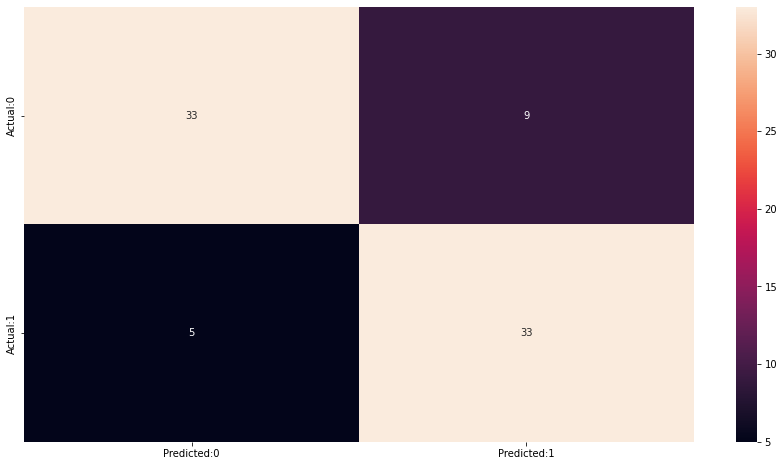

In [31]:
import seaborn as sns
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix,annot=True)
plt.show()

In [32]:
cm

array([[33,  9],
       [ 5, 33]])

In [33]:
TN = cm[0,0]
FP =cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [34]:
#sensitivity recall for positive class
sensitivity = TP /(FN+TP)
sensitivity

0.868421052631579

In [35]:
#specificity recall for Negative class
specificity = TN /(TN+FP)
specificity

0.7857142857142857

In [36]:
from sklearn.metrics import recall_score
recall_score(ytest,ypred)

0.868421052631579

In [37]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.82        42
           1       0.79      0.87      0.82        38

    accuracy                           0.82        80
   macro avg       0.83      0.83      0.82        80
weighted avg       0.83      0.82      0.82        80



**This is on the higher side. This value should be closed to 0.**

In [38]:
ypred_prob

332    0.050634
111    0.800663
352    0.016492
205    0.000668
56     0.001146
         ...   
304    0.037234
187    0.997764
166    0.118340
64     0.549633
27     0.000442
Length: 80, dtype: float64

**Print the first 5 rows**

In [39]:
from sklearn.metrics import roc_curve,roc_auc_score

1. In all the above metrics- we were passing ytest and ypred. ypred is the label
2. In ROC curve, we are passing ytest and ypred_prob. Here we pass the probabilities.
3. We are focusing on positive class and not negative class.
4. ROC curve gives us 3 set  values - First is FPR, Second -TPR and third -Threshold.

In [40]:
print(roc_curve(ytest,ypred_prob))

(array([0.        , 0.        , 0.        , 0.02380952, 0.02380952,
       0.04761905, 0.04761905, 0.14285714, 0.14285714, 0.23809524,
       0.23809524, 0.30952381, 0.30952381, 0.33333333, 0.33333333,
       0.54761905, 0.54761905, 1.        ]), array([0.        , 0.02631579, 0.63157895, 0.63157895, 0.71052632,
       0.71052632, 0.76315789, 0.76315789, 0.86842105, 0.86842105,
       0.92105263, 0.92105263, 0.94736842, 0.94736842, 0.97368421,
       0.97368421, 1.        , 1.        ]), array([1.99954144e+00, 9.99541441e-01, 9.31355628e-01, 9.09319667e-01,
       8.60956416e-01, 8.58806131e-01, 8.41911606e-01, 7.97157602e-01,
       6.18555435e-01, 4.92806012e-01, 3.80298891e-01, 2.33502048e-01,
       2.21233752e-01, 2.20817772e-01, 1.95004427e-01, 6.35077653e-02,
       5.06341297e-02, 1.00881402e-04]))


In [41]:
fpr,tpr,threshold =roc_curve(ytest,ypred_prob)

**Now plot - fpr, tpr**

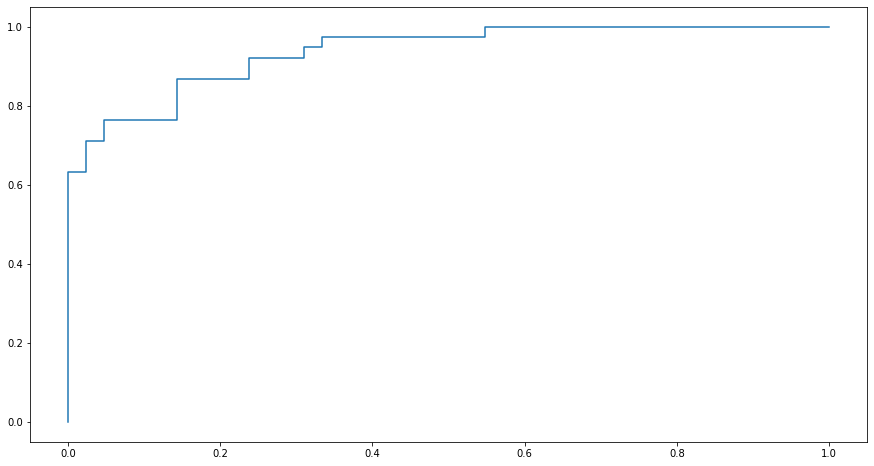

In [42]:
plt.plot(fpr,tpr)

0.93671679197995


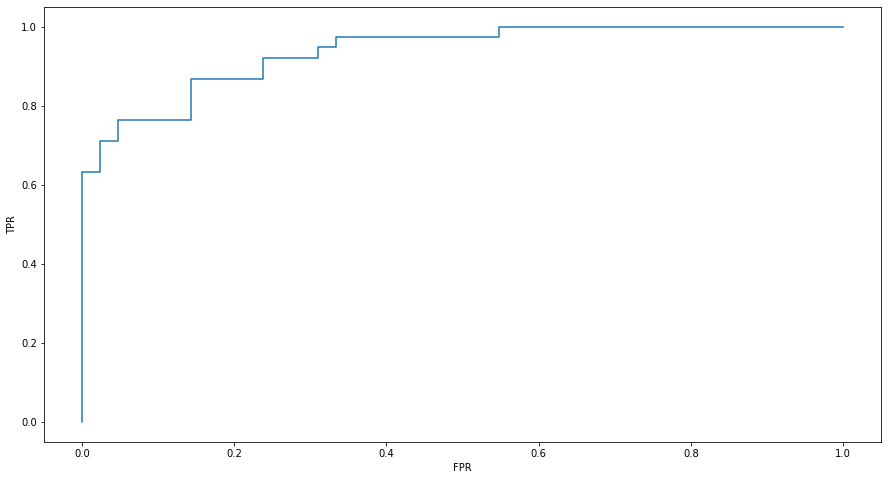

In [43]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

print(roc_auc_score(ytest,ypred_prob))

1. Only in AUC, ROC -We use probability and not in all others

**All at one Summary Table**

In [44]:

from sklearn.metrics import recall_score,precision_score,f1_score



In [45]:
accuracy_logReg    =accuracy_score(ytest,ypred)
f1score_logReg     =f1_score(ytest,ypred)
recall_logReg      =recall_score(ytest,ypred)
precision_logReg   =precision_score(ytest,ypred)
aic_logReg         =logreg.aic
auc_logReg         = roc_auc_score(ytest,ypred_prob)


In [46]:
cols_sum = ["Model", "Accuracy","Recall","Precision","F1 Score",'AUC','AIC']
df_cols_sum = pd.DataFrame(columns = cols_sum)


model_sum = pd.Series({"Model": "LogisticReg-Base",
                        "Accuracy":accuracy_logReg,
                        "Recall":recall_logReg,
                        "Precision":precision_logReg,
                        "F1 Score":f1score_logReg,
                        "AUC":auc_logReg,
                        "AIC":aic_logReg
                            })

result_sum = df_cols_sum.append(model_sum, ignore_index = True)

result_sum

<ipython-input-46-c2bcbf52728d>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_sum = df_cols_sum.append(model_sum, ignore_index = True)


,Model,Accuracy,Recall,Precision,F1 Score,AUC,AIC
0,LogisticReg-Base,0.825,0.868421,0.785714,0.825,0.936717,170.448593


In [47]:
logreg.params

const               -63.176338
GRE Score             0.053187
TOEFL Score           0.032814
University Rating     0.515006
SOP                   0.175796
LOR                   0.570331
CGPA                  4.411370
Research              0.581890
dtype: float64

In [48]:
# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [49]:
# consider a list of values for cut-off

cutoff_per = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'f1-score'])

thresh_value = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


for cutoff in thresh_value:


  ypred_prob = logreg.predict(xtest_c)
  ypred = [ 0 if x < cutoff else 1 for x in ypred_prob]

  global cutoff_per

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
  cutoff_per = cutoff_per.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)}, 
                                    ignore_index = True)

    
 



<ipython-input-49-f927ecd5c775>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cutoff_per = cutoff_per.append({'Probability Cutoff': cutoff,
<ipython-input-49-f927ecd5c775>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cutoff_per = cutoff_per.append({'Probability Cutoff': cutoff,
<ipython-input-49-f927ecd5c775>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cutoff_per = cutoff_per.append({'Probability Cutoff': cutoff,
<ipython-input-49-f927ecd5c775>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cutoff_per = cutoff_per.append({'Probability Cutoff': cutoff,
<ipython-input-49-f927ecd5c775>:19: FutureWarning: The frame.append 

In [50]:
cutoff_per

,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,0.1,0.760652,0.660714,0.973684,0.7500,0.787234
1,0.2,0.807018,0.720000,0.947368,0.8000,0.818182
2,0.3,0.829574,0.760870,0.921053,0.8250,0.833333
3,0.4,0.828321,0.772727,0.894737,0.8250,0.829268
4,0.5,0.827068,0.785714,0.868421,0.8250,0.825000
5,0.6,0.862782,0.846154,0.868421,0.8625,0.857143
6,0.7,0.823308,0.833333,0.789474,0.8250,0.810811
7,0.8,0.822055,0.852941,0.763158,0.8250,0.805556
8,0.9,0.803885,0.960000,0.631579,0.8125,0.761905


1. Best results are obtained for cutoff value of 0.6
2. We can start using cutoff =0.6 instead of cutoff = 0.5

<a id="youden"></a>
### Youden's Index

Youden's Index is the classification cut-off probability for which the (Sensitivity + Specificity - 1) is maximized.<br>

<p style='text-indent:12em'> <strong>Youden's Index = max(TPR + TNR - 1) = max(TPR - FPR) </strong> </p>

i.e. select the cut-off probability for which the (TPR - FPR) is maximum.

In [52]:
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': threshold})


# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR


youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.868421,0.142857,0.618555,0.725564
1,0.763158,0.047619,0.841912,0.715539
2,0.710526,0.023810,0.860956,0.686717
3,0.921053,0.238095,0.380299,0.682957
4,0.710526,0.047619,0.858806,0.662907


In [53]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden = [ 0 if x < 0.62 else 1 for x in ypred_prob]

In [54]:
acc_table = classification_report(ytest, y_pred_youden)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        42
           1       0.84      0.84      0.84        38

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



In [55]:
accuracy_log    =accuracy_score(ytest,y_pred_youden)
f1score_log     =f1_score(ytest,y_pred_youden)
recall_log      =recall_score(ytest,y_pred_youden)
precision_log   =precision_score(ytest,y_pred_youden)
auc_log         = roc_auc_score(ytest,y_pred_youden)

In [56]:
cols_per = ["Model", "Accuracy","Recall","Precision","F1 Score",'AUC']
df_cols_per = pd.DataFrame(columns = cols_per)


model_per = pd.Series({  "Model": "LogisticReg-Youden",
                        "Accuracy":accuracy_log,
                        "Recall":recall_log,
                        "Precision":precision_log,
                        "F1 Score":f1score_log,
                        "AUC":auc_log
                        })

result_per = df_cols_per.append(model_per, ignore_index = True)

result_per

<ipython-input-56-a4e958b77898>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_per = df_cols_per.append(model_per, ignore_index = True)


,Model,Accuracy,Recall,Precision,F1 Score,AUC
0,LogisticReg-Youden,0.85,0.842105,0.842105,0.842105,0.849624


**SKLEARN - LOGISTIC REGRESSION**

There are no parameters in logistic regression

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,
                                             test_size=0.20,
                                             random_state=10)

In [60]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

ypred_lr_train = lr.predict(xtrain)
ypred_lr= lr.predict(xtest)

ypred_lr

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0])

**Training Performance**

In [61]:
print(accuracy_score(ytrain,ypred_lr_train))
print(confusion_matrix(ytrain,ypred_lr_train))
print(classification_report(ytrain,ypred_lr_train))

0.8625
[[159  19]
 [ 25 117]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       178
           1       0.86      0.82      0.84       142

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



**Testing Performance**

In [62]:
print(accuracy_score(ytest,ypred_lr))
print(confusion_matrix(ytest,ypred_lr))
print(classification_report(ytest,ypred_lr))

0.775
[[32 10]
 [ 8 30]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        42
           1       0.75      0.79      0.77        38

    accuracy                           0.78        80
   macro avg       0.78      0.78      0.77        80
weighted avg       0.78      0.78      0.78        80



**1. There se**ems to be large difference between Train and Test Data

### Summarize the logistic Regression

In [63]:
accuracy_lr    =accuracy_score(ytest,ypred_lr)
f1score_lr     =f1_score(ytest,ypred_lr)
recall_lr      =recall_score(ytest,ypred_lr)
precision_lr   =precision_score(ytest,ypred_lr)
auc_lr         = roc_auc_score(ytest,ypred_lr)


In [64]:
cols_per = ["Model", "Accuracy","Recall","Precision","F1 Score",'AUC']
# df_cols_per = pd.DataFrame(columns = cols_per)


model_per = pd.Series({  "Model": "LogisticReg-Base",
                        "Accuracy":accuracy_lr,
                        "Recall":recall_lr,
                        "Precision":precision_lr,
                        "F1 Score":f1score_lr,
                        "AUC":auc_lr
                        })

result_per = result_per.append(model_per, ignore_index = True)

result_per

,Model,Accuracy,Recall,Precision,F1 Score,AUC
0,LogisticReg-Youden,0.850,0.842105,0.842105,0.842105,0.849624
1,LogisticReg-Base,0.775,0.789474,0.750000,0.769231,0.775689
